In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/insurance (1).csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
data.shape

(1338, 7)

In [8]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [9]:
data.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

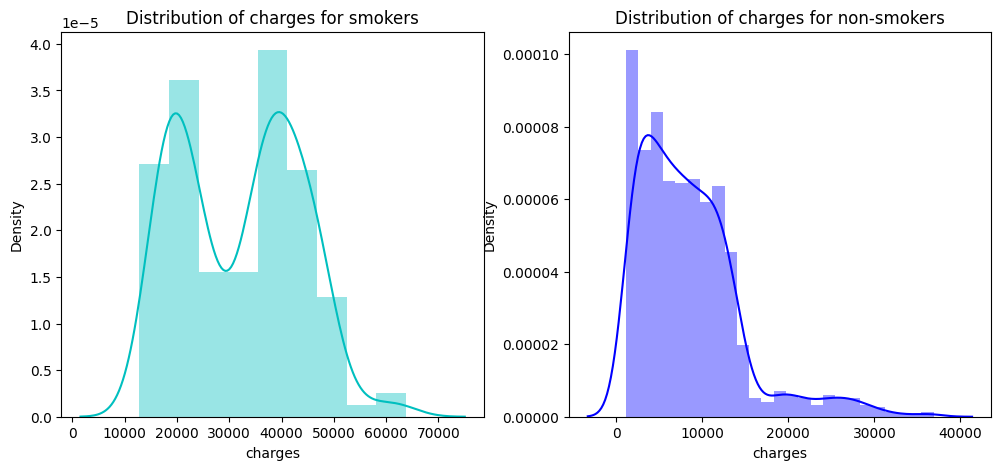

In [13]:
# distribution of charges for smokers and non smokers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

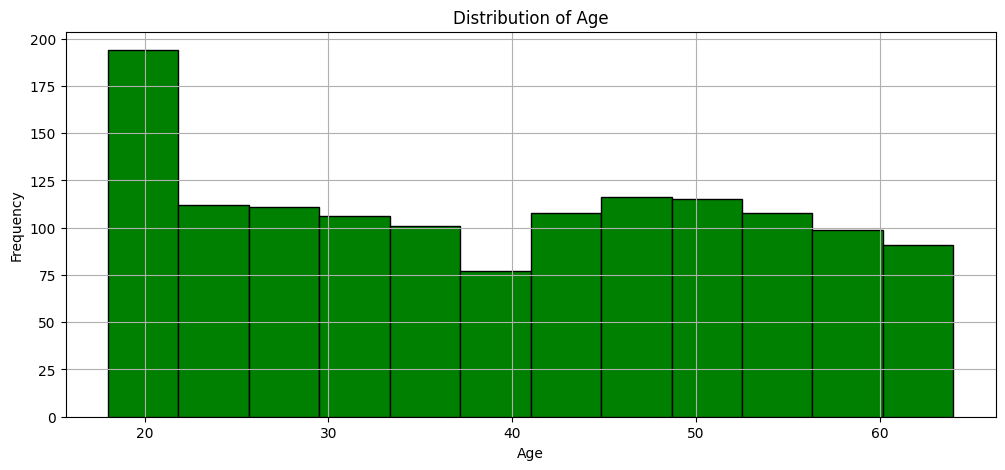

In [18]:
age = data["age"]

# Create the distribution plot
plt.figure(figsize=(12, 5))
plt.hist(age, bins='auto', color='green', edgecolor='black')  # Adjust 'bins' parameter if needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

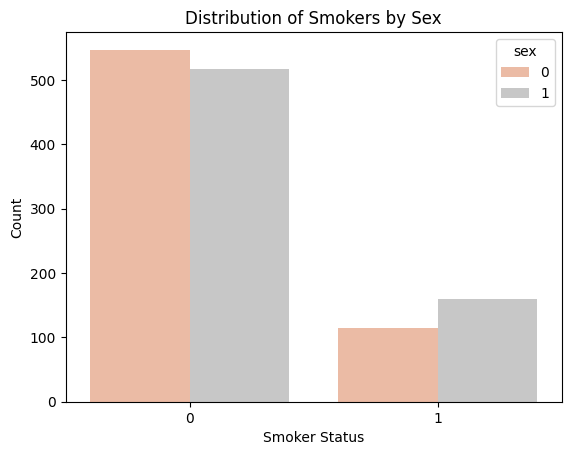

In [16]:
sns.countplot(x="smoker", hue="sex", data=data, palette="RdGy")  # Replace "RdGy" with your preferred palette
plt.xlabel("Smoker Status")
plt.ylabel("Count")
plt.title("Distribution of Smokers by Sex")
plt.show()

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

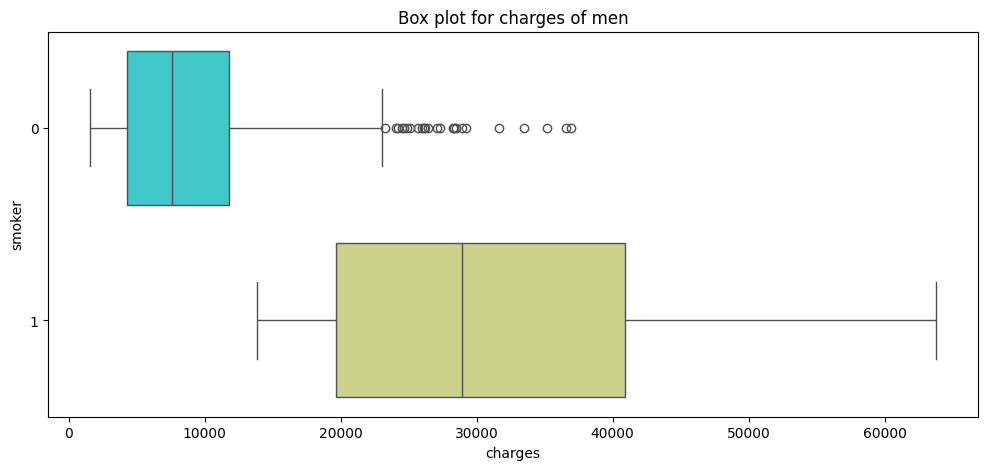

In [17]:
# men smoke more compared to women, so check for charges

pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

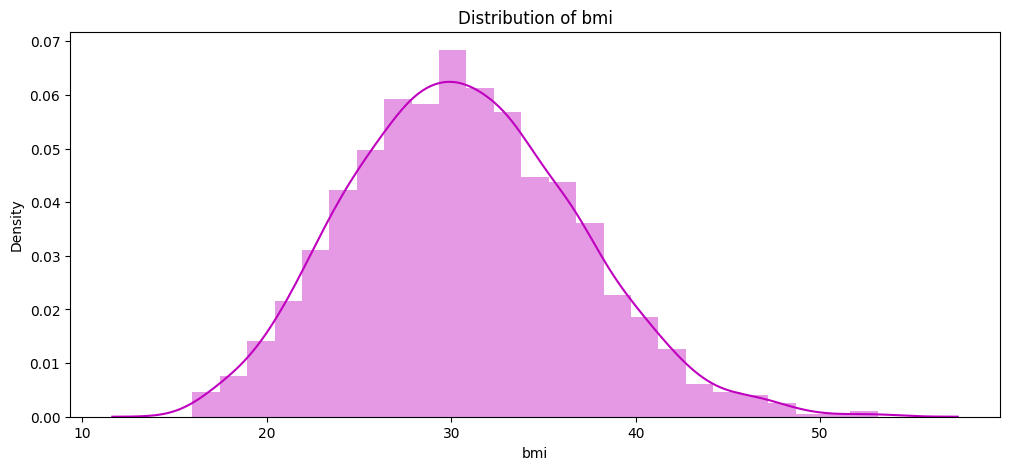

In [22]:
# distribution of BMI
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

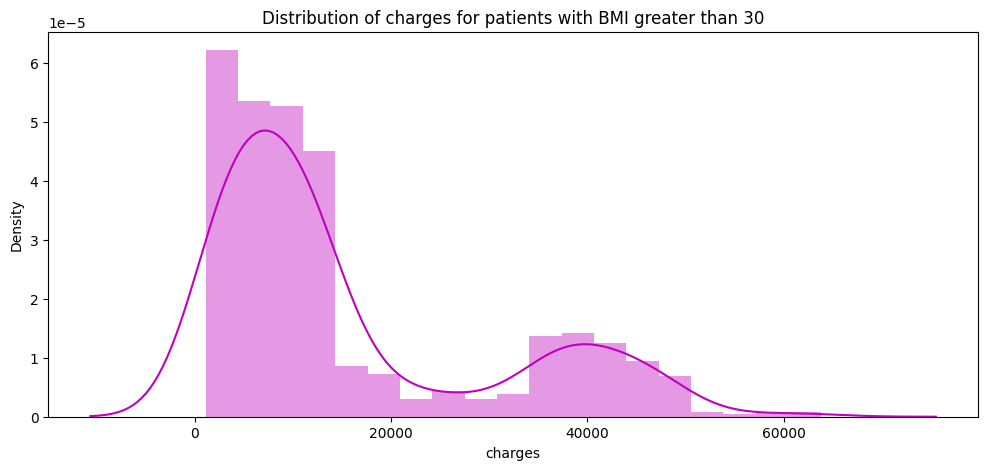

In [23]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

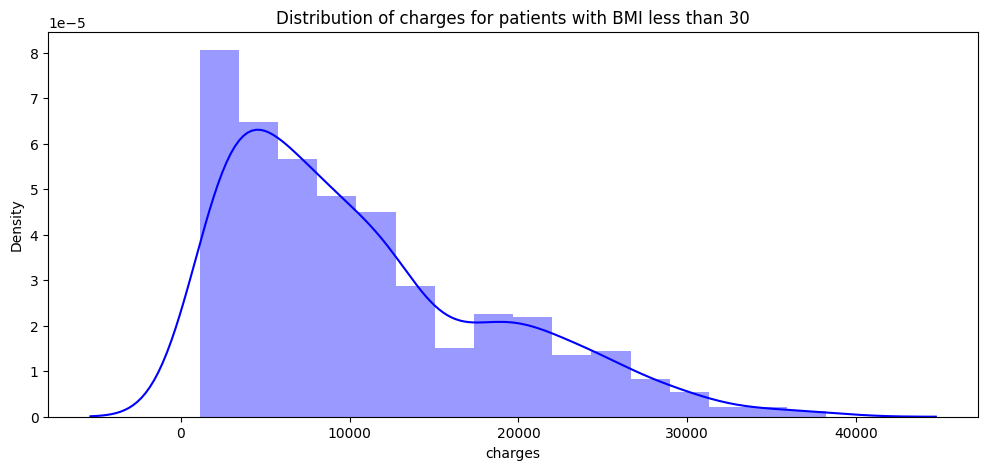

In [24]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

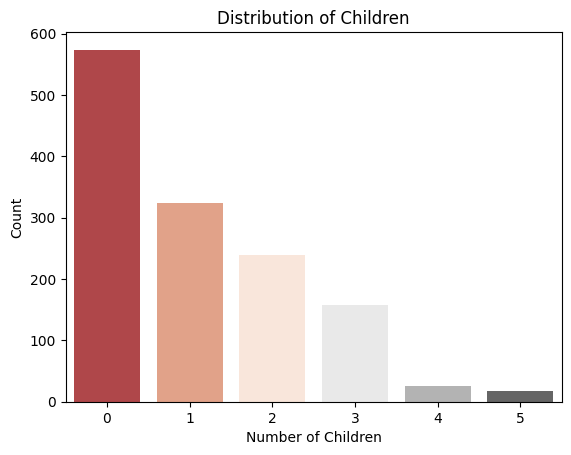

In [25]:
sns.countplot(x="children", data=data, palette="RdGy")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Distribution of Children")
plt.xticks(rotation=0)
plt.show()

In [28]:
data.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


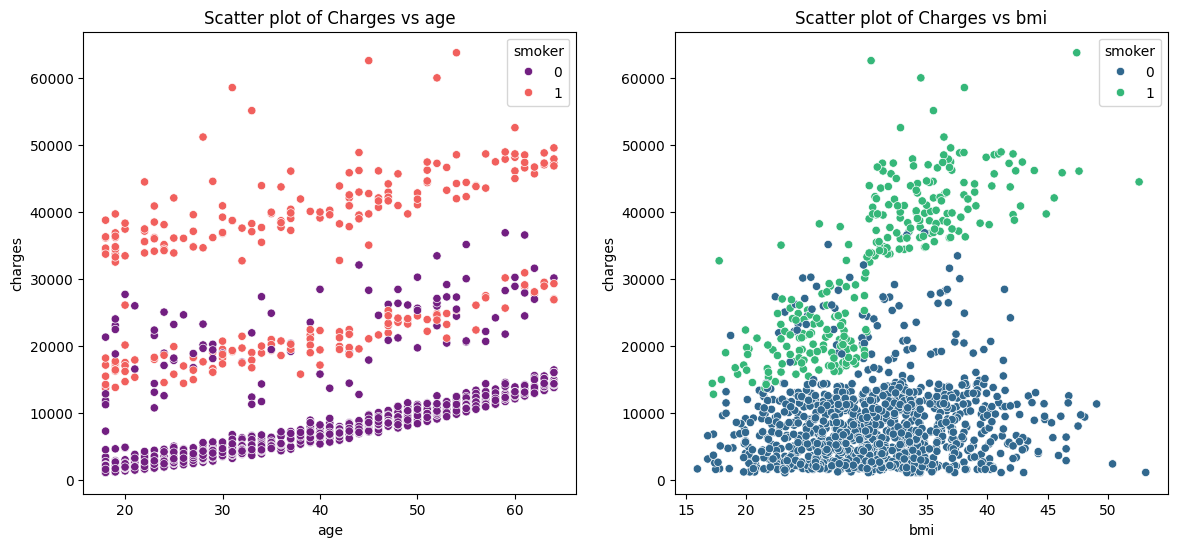

In [30]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=data,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=data,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [32]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'data' is your DataFrame
X = data.drop(['charges', 'region'], axis=1)  # Features (predictors)
Y = data.charges  # Target variable

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)  # Adjust n_estimators as needed

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)

# Evaluate model performance
print("R-squared (Training):", r2_score(Y_train, Y_train_pred))
print("R-squared (Test):", r2_score(Y_test, Y_test_pred))
print("Mean Squared Error:", mean_squared_error(Y_test, Y_test_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_test_pred))


R-squared (Training): 0.9725538286335328
R-squared (Test): 0.8673082891811428
Mean Squared Error: 20890254.844125263
Mean Absolute Error: 2627.262297419328
